### Import libraries

In [97]:
# Common imports
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from joblib import dump, load

#### Load dataset

The dataset we will use is the "Ames Housing Dataset" dataset

In [52]:
data = pd.read_csv("AmesHousing.csv")
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [8]:
data.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [11]:
data.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [14]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [130]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [131]:
# Check for categorical columns (type 'object' or 'category')
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Print categorical columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


#### Analyze the relationship between categorical columns and SalePrice:

In [143]:
# inspect on why there are many corelation=nan
# Initialize a dictionary to store the percentage and count of missing values
missing_value_analysis = {}

# Analyze the columns with NaN in correlation ratio
columns_with_nan = ['Alley', 'Mas Vnr Type', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
                    'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Fireplace Qu', 
                    'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 
                    'Pool QC', 'Fence', 'Misc Feature']

# Analyze missing values in each column
for col in columns_with_nan:
    missing_count = data[col].isna().sum()  # Number of missing rows
    total_count = len(data[col])            # Total number of rows
    missing_percentage = (missing_count / total_count) * 100  # Percentage of missing rows
    missing_value_analysis[col] = {'missing_count': missing_count, 'missing_percentage': missing_percentage}

# Output the missing value analysis
missing_value_analysis


{'Alley': {'missing_count': 2732, 'missing_percentage': 93.24232081911262},
 'Mas Vnr Type': {'missing_count': 23,
  'missing_percentage': 0.7849829351535836},
 'Bsmt Qual': {'missing_count': 80, 'missing_percentage': 2.7303754266211606},
 'Bsmt Cond': {'missing_count': 80, 'missing_percentage': 2.7303754266211606},
 'Bsmt Exposure': {'missing_count': 83,
  'missing_percentage': 2.832764505119454},
 'BsmtFin Type 1': {'missing_count': 80,
  'missing_percentage': 2.7303754266211606},
 'BsmtFin Type 2': {'missing_count': 81,
  'missing_percentage': 2.7645051194539247},
 'Electrical': {'missing_count': 1,
  'missing_percentage': 0.034129692832764506},
 'Fireplace Qu': {'missing_count': 1422,
  'missing_percentage': 48.532423208191126},
 'Garage Type': {'missing_count': 157,
  'missing_percentage': 5.3583617747440275},
 'Garage Finish': {'missing_count': 159,
  'missing_percentage': 5.426621160409556},
 'Garage Qual': {'missing_count': 159,
  'missing_percentage': 5.426621160409556},
 'Gar

In [152]:
# Find columns with missing percentage less than 5%
columns_to_keep = [col for col, stats in missing_value_analysis.items() if stats['missing_percentage'] < 5]

# Drop rows with missing values in these columns
data_filtered = data.dropna(subset=columns_to_keep)

columns_to_keep

['Mas Vnr Type',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Electrical']

In [153]:
# Drop the columns with missing percentage more than 5% from the categorical_columns list
columns_nans = [col for col, stats in missing_value_analysis.items() if stats['missing_percentage'] > 5]
categorical_columns_filtered = [col for col in categorical_columns if col not in columns_nans]

# Output the cleaned categorical columns list
categorical_columns_filtered

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [154]:
# compute the correlation ratio for filtered categorical columns and SalePrice 

correlation_ratios = {}
for col in categorical_columns_filtered:
    corr_ratio = correlation_ratio(data_filtered[col], data_filtered['SalePrice'])
    correlation_ratios[col] = corr_ratio

# Sort the correlation ratios in descending order
sorted_corr_ratios = sorted(correlation_ratios.items(), key=lambda x: x[1], reverse=True)

# Display the sorted correlation ratios
sorted_corr_ratios

[('Neighborhood', 0.7550326141312642),
 ('Bsmt Qual', 0.7093960748386166),
 ('Exter Qual', 0.7060141373978372),
 ('Kitchen Qual', 0.6893042929351406),
 ('Foundation', 0.5222882595025767),
 ('BsmtFin Type 1', 0.45812661327223386),
 ('Heating QC', 0.4539900150370955),
 ('Mas Vnr Type', 0.43752677038169185),
 ('Exterior 2nd', 0.40868882690741326),
 ('Exterior 1st', 0.4065590243286045),
 ('Bsmt Exposure', 0.4044064099899723),
 ('Sale Type', 0.36907470150062693),
 ('Sale Condition', 0.36451992517945864),
 ('MS Zoning', 0.34161794367385917),
 ('Lot Shape', 0.2977742904780454),
 ('Roof Style', 0.2849995260389662),
 ('House Style', 0.2802686518936242),
 ('Paved Drive', 0.2602584619496903),
 ('Central Air', 0.23923082807393786),
 ('Electrical', 0.22884413371750467),
 ('Condition 1', 0.21438427891559794),
 ('Land Contour', 0.21145934294963117),
 ('Bldg Type', 0.17382322201639924),
 ('Bsmt Cond', 0.1645252140316821),
 ('Condition 2', 0.15910105155191037),
 ('Exter Cond', 0.15366194742233333),
 ('

In [157]:
# Filter and output the correlation ratios that are more than 50% (0.5)
correlation_ratios_above_50 = {col: ratio for col, ratio in sorted_corr_ratios if ratio > 0.5}

# Output the filtered results
correlation_ratios_above_50

{'Neighborhood': 0.7550326141312642,
 'Bsmt Qual': 0.7093960748386166,
 'Exter Qual': 0.7060141373978372,
 'Kitchen Qual': 0.6893042929351406,
 'Foundation': 0.5222882595025767}

#### Correlation analysis for numerical columns

In [53]:
corr = data.corrwith(data['SalePrice'])
# print(corr)
# Filter rows where the correlation is greater than certain percentage
filtered_corr = corr[corr > 0.6]

# Print the result
print(filtered_corr)

# Count the number of rows with corr > 0.2
count_filtered = filtered_corr.count()

# Total number of rows in the correlation series
total_rows = corr.count()

# Calculate proportion
proportion = count_filtered / total_rows

# Print the results
print(f'Rows with corr > 0.2: {count_filtered} out of {total_rows}')
print(f'Proportion: {proportion:.2%}')

Overall Qual     0.799262
Total Bsmt SF    0.632280
1st Flr SF       0.621676
Gr Liv Area      0.706780
Garage Cars      0.647877
Garage Area      0.640401
SalePrice        1.000000
dtype: float64
Rows with corr > 0.2: 7 out of 39
Proportion: 17.95%


#### Exploratory Data Analysis (EDA)

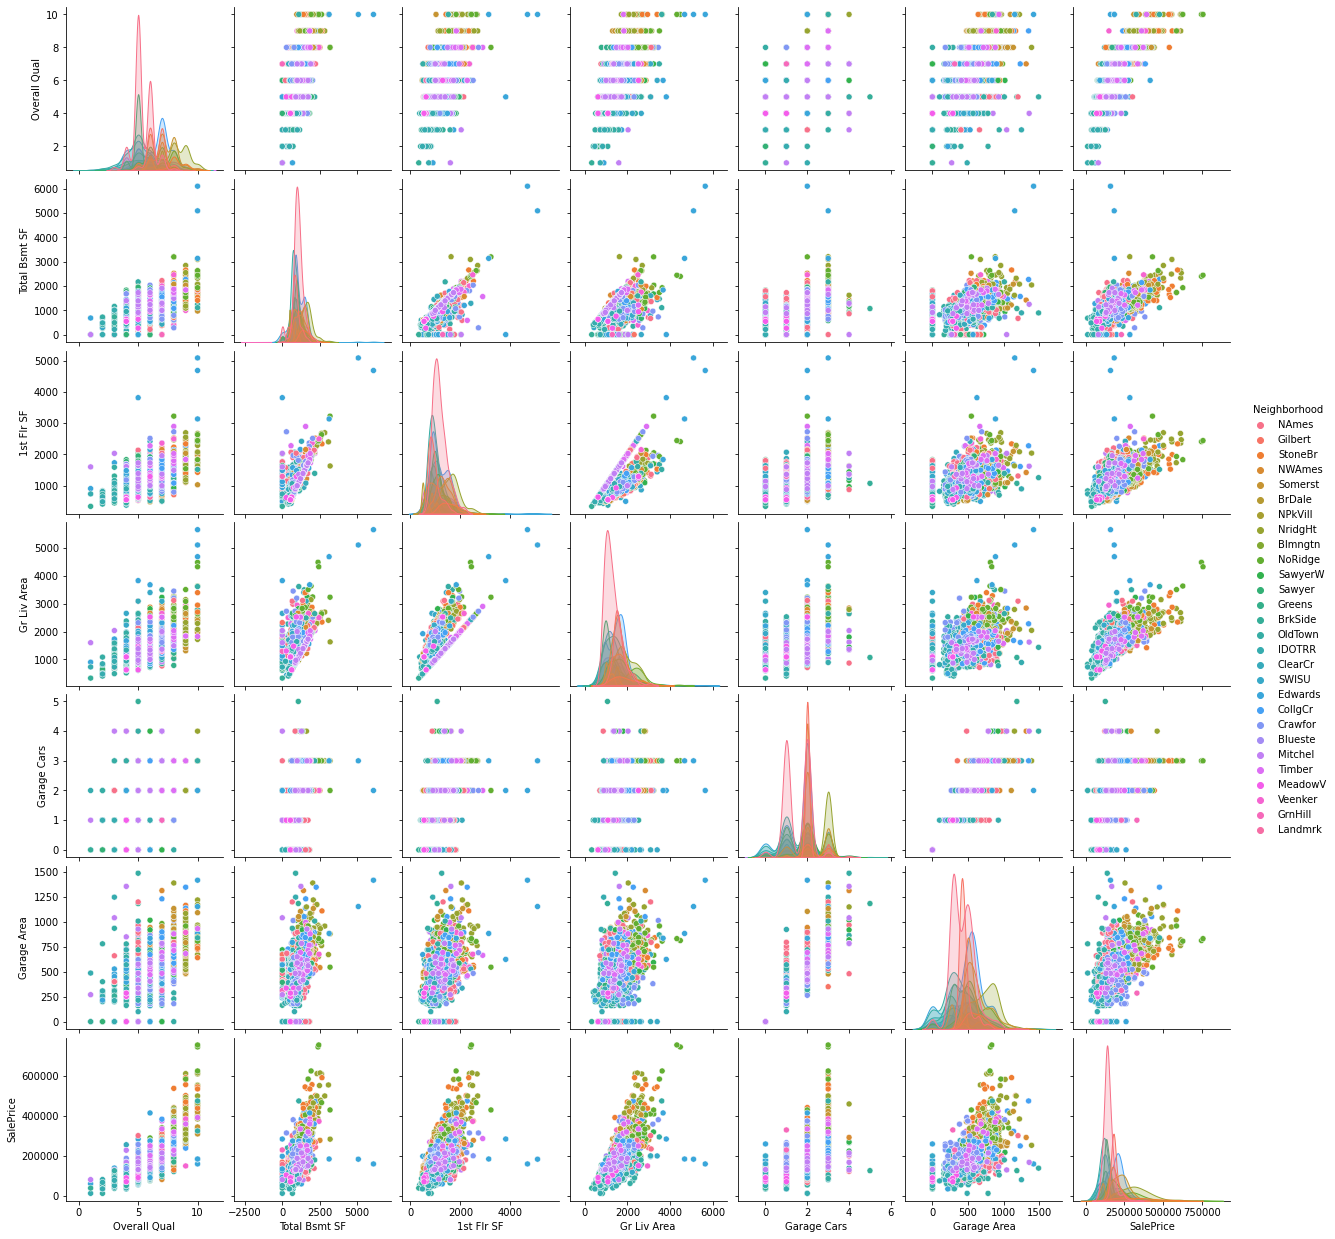

In [159]:
# Filtered columns from previous step
selected_features = ['Neighborhood','Bsmt Qual', 'Exter Qual', 'Kitchen Qual','Foundation', 'Overall Qual', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'SalePrice']

# Create a new DataFrame with these selected features
data_selected = data[selected_features]

# Create the pairplot
sns.pairplot(data_selected, hue = 'Neighborhood')
plt.show()

In [ ]:
# %matplotlib inline
# data.hist(bins=50, figsize=(20, 15))

#### Define X and Y

In [160]:
X=data_selected
X=X.drop('SalePrice', axis=1)

y=data['SalePrice']

In [161]:
# Check for missing values (NaN)
print(X.isnull().sum())

# Check for infinite values
print(np.isinf(X).sum())

Neighborhood      0
Bsmt Qual        80
Exter Qual        0
Kitchen Qual      0
Foundation        0
Overall Qual      0
Total Bsmt SF     1
1st Flr SF        0
Gr Liv Area       0
Garage Cars       1
Garage Area       1
dtype: int64


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [162]:
# Drop rows with missing values
X_cleaned = X.dropna()

y = y.loc[X_cleaned.index]  # Keep only rows in y that match X_cleaned

In [163]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

ValueError: could not convert string to float: 'NAmes'

#### Preprocessing

In [113]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

In [114]:
poly_features=polynomial_converter.fit(X_scaled)

In [115]:
poly_features=polynomial_converter.transform(X_scaled)

In [116]:
poly_features.shape

(2928, 27)

In [117]:
X_scaled.shape

(2928, 6)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.2, random_state=42)

#### Training a Polynomial Regression Model

In [119]:
polymodel=LinearRegression()

In [120]:
polymodel.fit(X_train, y_train)

LinearRegression()

#### Predicting testing data

In [121]:
y_pred=polymodel.predict(X_test)

In [122]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
2392,344133,277758.798670,66374.201330
196,132000,130986.505674,1013.494326
2309,192100,250924.671307,-58824.671307
1732,198444,176407.342109,22036.657891
1100,250000,299606.717578,-49606.717578


#### Evaluating the Model

In [123]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,2.143529e+04
MSE,1.028299e+09
RMSE,3.206710e+04


#### Compare to the simple linear regression:

In [124]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [125]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,2.143529e+04,2.623456e+04
MSE,1.028299e+09,1.905110e+09
RMSE,3.206710e+04,4.364756e+04


#### Adjusting Model Parameters¶


In [126]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X_scaled)
    poly_features= polynomial_converter.transform(X_scaled)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [127]:
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,34595.696281
1,29707.448553
2,26921.882855
3,24046.218732
4,20902.660909
5,16631.896100
6,10321.502604
7,7625.286311
8,5988.136622


In [128]:
pd.DataFrame({'test RMSE List':test_RMSE_list})

,test RMSE List
0,4.364756e+04
1,3.297911e+04
2,1.565107e+05
3,1.270260e+05
4,7.086665e+06
5,7.675950e+12
6,1.006563e+14
7,4.162167e+15
8,9.000631e+15


#### Plot the Polynomial degree VS RMSE

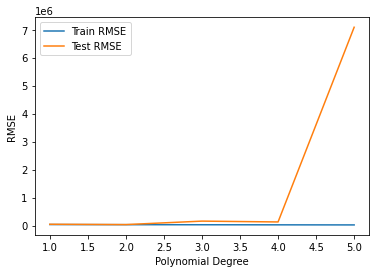

In [129]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()